In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src import config
from sqlalchemy import create_engine

In [ ]:
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)


In [8]:
orders = pd.read_sql_table('olist_orders', ENGINE)
payments = pd.read_sql_table('olist_order_payments', ENGINE)
items = pd.read_sql_table('olist_order_items', ENGINE)
customers = pd.read_sql_table('olist_customers', ENGINE)
products = pd.read_sql_table('olist_products', ENGINE)

In [9]:

# Convertir fechas a tipo datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Unir datos relevantes
merged_df = orders.merge(payments, on='order_id')
merged_df = merged_df.merge(customers, on='customer_id')
merged_df = merged_df.merge(items, on='order_id')
merged_df = merged_df.merge(products, on='product_id')

# Crear columnas adicionales
merged_df['year'] = merged_df['order_purchase_timestamp'].dt.year
merged_df['month'] = merged_df['order_purchase_timestamp'].dt.strftime('%b')
merged_df['delivery_days'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days
merged_df['delay_days'] = (merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']).dt.days


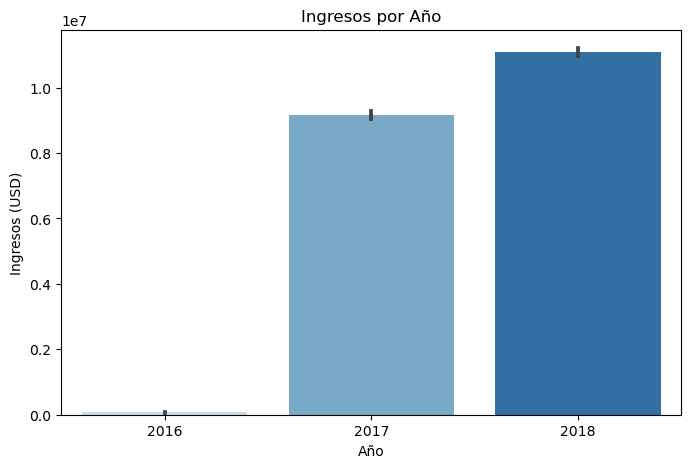

In [10]:
# 1. Ingresos por Año
plt.figure(figsize=(8,5))
sns.barplot(x=merged_df['year'], y=merged_df['payment_value'], estimator=sum, palette='Blues')
plt.title('Ingresos por Año')
plt.ylabel('Ingresos (USD)')
plt.xlabel('Año')
plt.show()

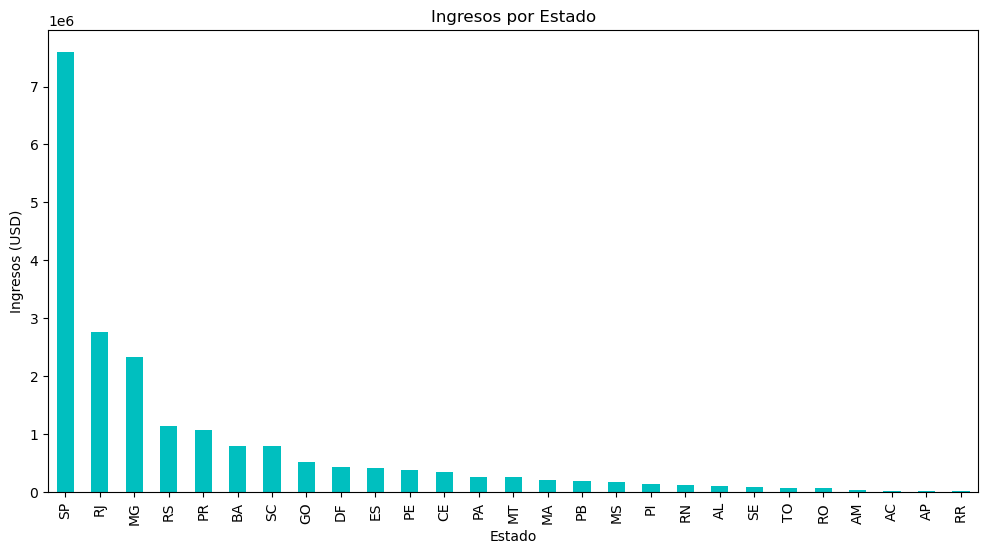

In [11]:
# 2. Ingresos por Estado
plt.figure(figsize=(12,6))
states_income = merged_df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False)
states_income.plot(kind='bar', color='c')
plt.title('Ingresos por Estado')
plt.ylabel('Ingresos (USD)')
plt.xlabel('Estado')
plt.show()

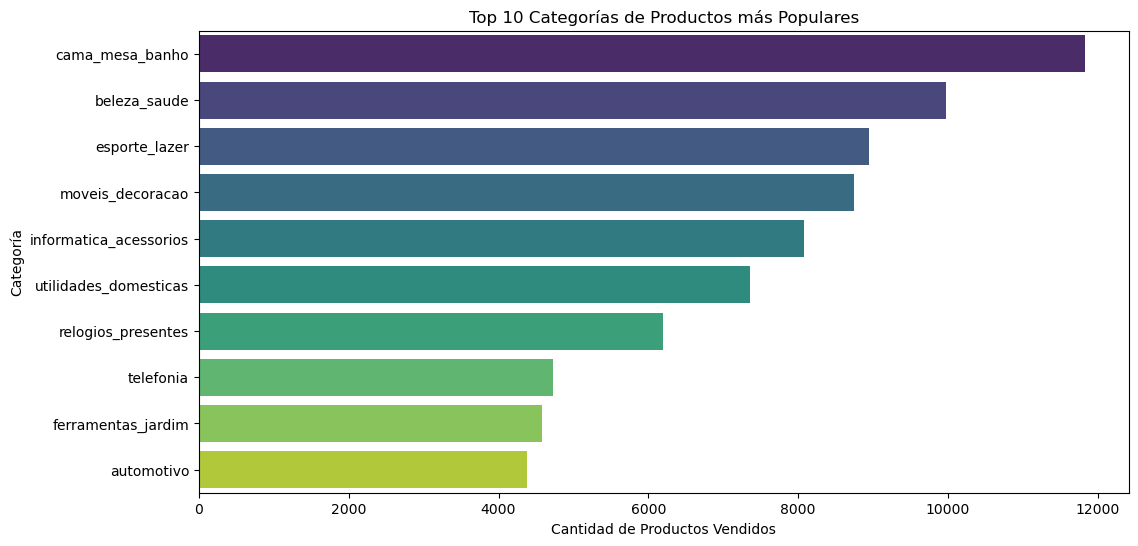

In [12]:
# 3. Categorías Más y Menos Populares
plt.figure(figsize=(12,6))
category_counts = merged_df['product_category_name'].value_counts().head(10)
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')
plt.title('Top 10 Categorías de Productos más Populares')
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Categoría')
plt.show()

c:\Users\edwin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\edwin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


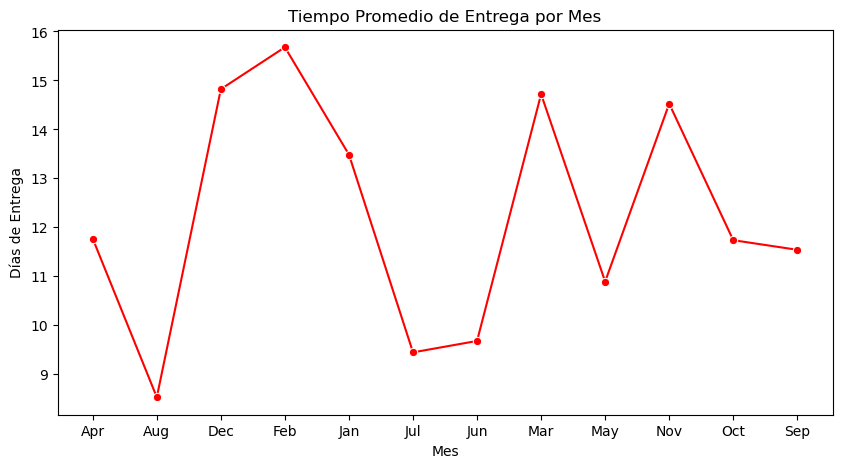

In [13]:
# 4. Tiempo de Entrega Promedio por Mes
plt.figure(figsize=(10,5))
delivery_avg = merged_df.groupby('month')['delivery_days'].mean().sort_index()
sns.lineplot(x=delivery_avg.index, y=delivery_avg.values, marker='o', color='r')
plt.title('Tiempo Promedio de Entrega por Mes')
plt.ylabel('Días de Entrega')
plt.xlabel('Mes')
plt.show()

c:\Users\edwin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


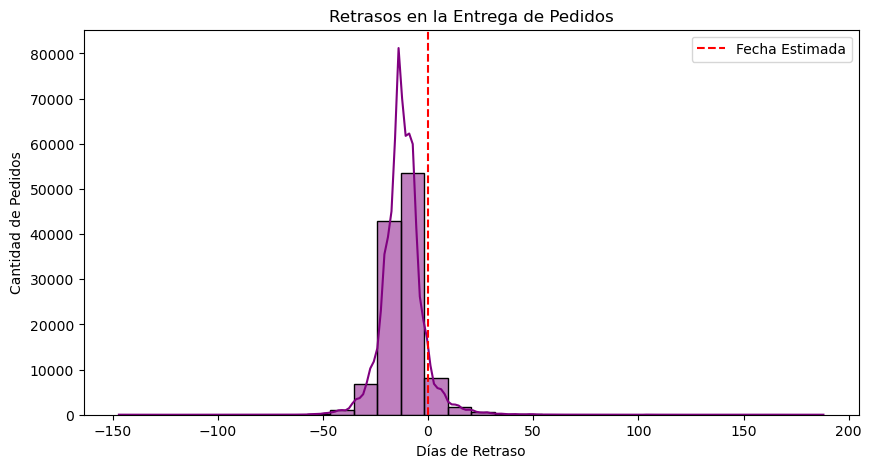

In [14]:
# 5. Diferencia entre Fecha Estimada y Fecha Real
plt.figure(figsize=(10,5))
sns.histplot(merged_df['delay_days'], bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', label='Fecha Estimada')
plt.title('Retrasos en la Entrega de Pedidos')
plt.xlabel('Días de Retraso')
plt.ylabel('Cantidad de Pedidos')
plt.legend()
plt.show()